In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# Load dataset
customer_data = pd.read_csv("Churn_Data.csv")
customer_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

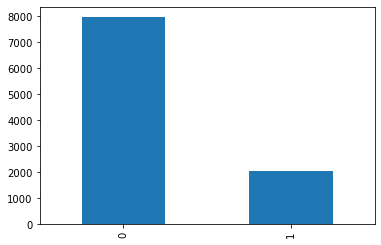

In [3]:
customer_data['Exited'].value_counts().plot(kind="bar")

In [4]:
# Drop unuseful columns
dataset = customer_data.drop(["RowNumber","Surname","CustomerId"], axis=1)

In [5]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Encode data
dataset_dummy = pd.get_dummies(dataset,drop_first=True)
dataset_dummy.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [7]:
dataset_dummy.shape

(10000, 12)

In [8]:
# Split data
X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

In [9]:
# Normalize data
scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])


<ipython-input-9-5eb6cd25171d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
C:\Users\tanth_000\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-9-5eb6cd25171d>:5: SettingWithCopyWarning: 
A va

In [10]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,0.672,0.189189,0.6,0.000000,0.333333,1,1,0.895550,0,0,1
1561,0.564,0.324324,0.4,0.476786,0.333333,1,1,0.980029,1,0,1
1670,0.418,0.081081,0.3,0.457317,0.000000,1,0,0.429261,0,1,1
6087,0.422,0.121622,0.9,0.540606,0.000000,1,0,0.765408,0,0,0
6669,0.334,0.513514,0.9,0.566554,0.000000,0,0,0.197107,0,0,1


In [11]:
# Performance evaluation
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))

def pre_train_data(dataset):
    X = pd.get_dummies(dataset,drop_first=True)
    X = X.drop(['Exited'], axis = 1)
    y = dataset['Exited']
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)
    
    scaler = MinMaxScaler()
    scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
    X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])   
    X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
    
    return X_train, X_test, y_train, y_test
    

In [12]:
X_train, X_test, y_train, y_test = pre_train_data(dataset)

<ipython-input-11-244ba73f35c8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
C:\Users\tanth_000\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-11-244ba73f35c8>:14: SettingWithCopyWarning: 


In [13]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,0.672,0.189189,0.6,0.000000,0.333333,1,1,0.895550,0,0,1
1561,0.564,0.324324,0.4,0.476786,0.333333,1,1,0.980029,1,0,1
1670,0.418,0.081081,0.3,0.457317,0.000000,1,0,0.429261,0,1,1
6087,0.422,0.121622,0.9,0.540606,0.000000,1,0,0.765408,0,0,0
6669,0.334,0.513514,0.9,0.566554,0.000000,0,0,0.197107,0,0,1


In [14]:
# Logistic regression with imbalanced data
model = LogisticRegression(class_weight = "balanced") 

# Train
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Result
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1607
           1       0.38      0.71      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.74      2000



In [15]:
# Random Forest 
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier(n_estimators=200, random_state=42) 

# Train
model_RFC.fit(X_train, y_train)

# Predict
y_pred = model_RFC.predict(X_test)

# Result
print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [16]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(learning_rate=0.01, random_state=42,n_estimators=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.84      0.33      0.48       393

    accuracy                           0.86      2000
   macro avg       0.85      0.66      0.70      2000
weighted avg       0.85      0.86      0.83      2000



In [17]:
# Random Undersampling data
dataset["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [18]:
dataset_0 = dataset[dataset.Exited==0]
dataset_1 = dataset[dataset.Exited==1]
dataset_0.shape, dataset_1.shape

((7963, 11), (2037, 11))

In [19]:
class_0_random_undersampling = dataset_0.sample(dataset_1.shape[0])
class_0_random_undersampling.shape

(2037, 11)

In [20]:
dataset_random_undersample = pd.concat([class_0_random_undersampling, dataset_1])
dataset_random_undersample.shape

(4074, 11)

In [21]:
# Process undersampling dataset
dataset_dummy = pd.get_dummies(dataset_random_undersample, drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])


<ipython-input-21-62db48fb0461>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
C:\Users\tanth_000\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-21-62db48fb0461>:12: SettingWithCopyWarning: 


In [22]:
# Logistic Regression on undersampling data

model = LogisticRegression() #Instantiating the algorithm class and unpacking parameters if any
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       443
           1       0.69      0.71      0.70       372

    accuracy                           0.72       815
   macro avg       0.72      0.72      0.72       815
weighted avg       0.72      0.72      0.72       815



In [23]:
# Near miss
dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

from imblearn.under_sampling import NearMiss
nm = NearMiss()

X_res, y_res = nm.fit_resample(X,y)
X_res.shape, y_res.shape

ModuleNotFoundError: No module named 'imblearn'

In [25]:
# Split data on X_res, y_res
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])


model = LogisticRegression() #Instantiating the algorithm class and unpacking parameters if any
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       443
           1       0.96      0.80      0.87       372

    accuracy                           0.89       815
   macro avg       0.90      0.88      0.89       815
weighted avg       0.90      0.89      0.89       815



In [26]:
# Random over sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_ros, y_ros = ros.fit_resample(X,y)
X_ros.shape, y_ros.shape

((15926, 11), (15926,))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])


model = LogisticRegression() #Instantiating the algorithm class and unpacking parameters if any
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores( y_test, y_pred)

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1633
           1       0.69      0.69      0.69      1553

    accuracy                           0.70      3186
   macro avg       0.70      0.70      0.70      3186
weighted avg       0.70      0.70      0.70      3186



In [28]:
# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()

dataset_dummy = pd.get_dummies(dataset,drop_first=True)

X = dataset_dummy.drop(["Exited"],axis=1)
y = dataset_dummy['Exited']

X_sm, y_sm = sm.fit_resample(X, y)
X_sm.shape, y_sm.shape

((15926, 11), (15926,))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state=42)

scaler = MinMaxScaler()
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]= scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

model = LogisticRegression() #Instantiating the algorithm class and unpacking parameters if any
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print_scores(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1633
           1       0.77      0.79      0.78      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



In [34]:
from sklearn.metrics import confusion_matrix, roc_auc_score
def Confusion_Matrix(y_test,y_pred):
    cfmat = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix: \n',classification_report(y_test,y_pred,labels=[0,1]))
    print("\n")
    print('TN - True Negative {}'.format(cfmat[1,1]))
    print('FP - False Positive {}'.format(cfmat[1,0]))
    print('FN - False Negative {}'.format(cfmat[0,1]))
    print('TP - True Positive {}'.format(cfmat[0,0]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))))
    print('F1-Score: {}'.format(f1_score(y_test, y_pred,average='macro')))
    print('ROC-AUC {}'.format(roc_auc_score(y_test,y_pred)))

In [35]:
Confusion_Matrix(y_test, y_pred)

Confusion Matrix: 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      1633
           1       0.77      0.79      0.78      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



TN - True Negative 1228
FP - False Positive 325
FN - False Negative 367
TP - True Positive 1266
Accuracy Rate: 0.7827997489014438
Misclassification Rate: 0.21720025109855617
F1-Score: 0.7827688461065516
ROC-AUC 0.782993940574492
